<a href="https://colab.research.google.com/github/Anirudh-Senani/Flipr_Hackathon_7_2020/blob/main/Flipr_ML_hackathon_7_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import RobustScaler
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
!git clone https://github.com/Anirudh-Senani/Flipr_Hackathon_7_2020/

fatal: destination path 'Flipr_Hackathon_7_2020' already exists and is not an empty directory.


In [30]:
train_data = pd.read_excel("/content/Flipr_Hackathon_7_2020/Data.xlsx",sheet_name='Train_Data', index_col = "PLAYER")
train_data.head()

,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
PLAYER,,,,,,,,,,,,,
Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,0,6,8,160
AB de Villiers,12,11,2,480,90*,53.33,275,174.54,0,6,39,30,424
Abhishek Sharma,3,3,2,63,46*,63,33,190.90,0,0,3,5,63
Ajinkya Rahane,15,14,1,370,65*,28.46,313,118.21,0,1,39,5,396
Alex Hales,6,6,0,148,45,24.66,118,125.42,0,0,13,6,165


In [31]:
train_data.dtypes

Mat            int64
Inns           int64
NO             int64
2018_Runs      int64
HS            object
Avg           object
BF             int64
SR           float64
100            int64
50             int64
4s             int64
6s             int64
2019_Runs      int64
dtype: object

In [32]:
train_data.HS = train_data.HS.astype('str').str.replace(r'[^\d.]+', '').astype('int64')

In [33]:
train_data.dtypes

Mat            int64
Inns           int64
NO             int64
2018_Runs      int64
HS             int64
Avg           object
BF             int64
SR           float64
100            int64
50             int64
4s             int64
6s             int64
2019_Runs      int64
dtype: object

In [34]:
train_data.loc[train_data.Avg == '-', 'Avg'] = train_data['2018_Runs'].loc[train_data.Avg == '-'].copy()
train_data.Avg = train_data.Avg.astype('float64')

In [35]:
train_data.dtypes

Mat            int64
Inns           int64
NO             int64
2018_Runs      int64
HS             int64
Avg          float64
BF             int64
SR           float64
100            int64
50             int64
4s             int64
6s             int64
2019_Runs      int64
dtype: object

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


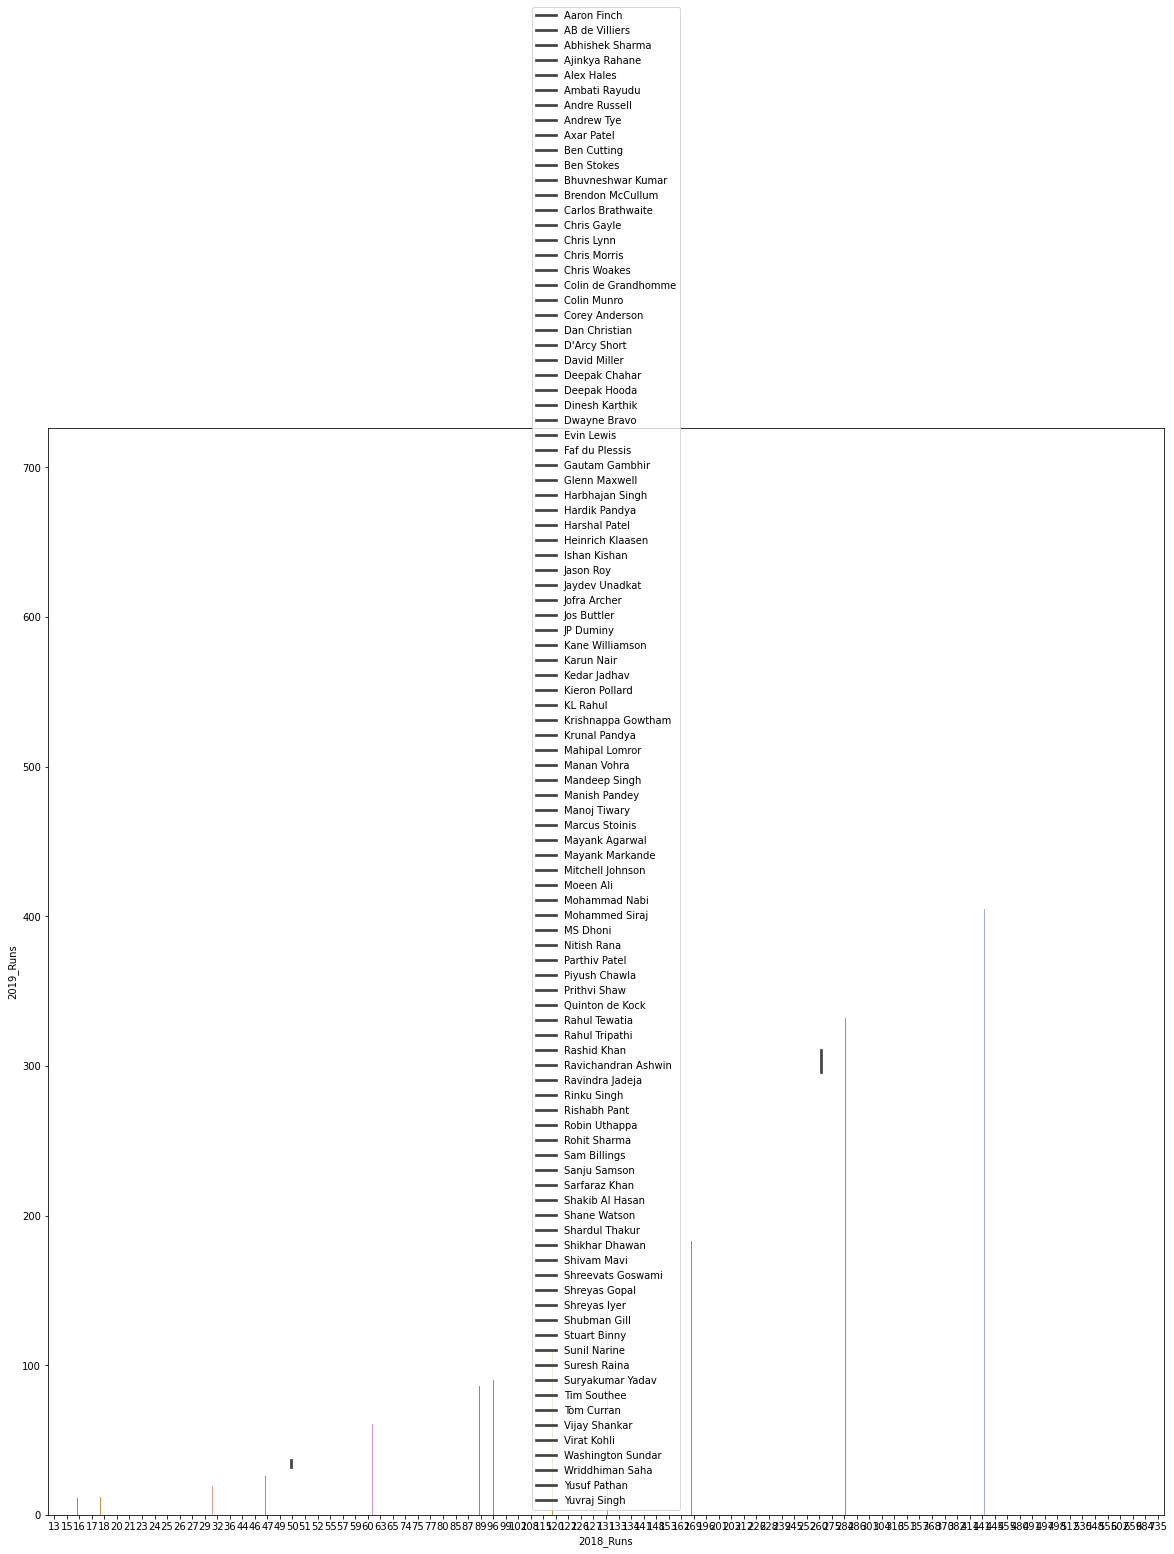

In [17]:
fig,ax = plt.subplots(figsize=(12,12))
#sns.barplot(x = '2018_Runs', y = '2019_Runs', data = train_data, ax = ax)
sns.histplot(train_data, )

In [36]:
test_data = pd.read_excel("/content/Flipr_Hackathon_7_2020/Data.xlsx", 'Test_Data', index_col= 'PLAYER')
test_data.head()

,Mat,Inns,NO,2019_Runs,HS,Avg,BF,SR,100,50,4s,6s
PLAYER,,,,,,,,,,,,
David Warner,12,12,2,692,100*,69.2,481,143.86,1,8,57,21
KL Rahul,14,14,3,593,100*,53.9,438,135.38,1,6,49,25
Quinton de Kock,16,16,1,529,81,35.26,398,132.91,0,4,45,25
Shikhar Dhawan,16,16,1,521,97*,34.73,384,135.67,0,5,64,11
Andre Russell,14,13,4,510,80*,56.66,249,204.81,0,4,31,52


In [37]:
test_data.dtypes

Mat            int64
Inns           int64
NO             int64
2019_Runs      int64
HS            object
Avg           object
BF             int64
SR           float64
100            int64
50             int64
4s             int64
6s             int64
dtype: object

In [38]:
test_data.HS = test_data.HS.astype('str').str.replace(r'[^\d.]+', '').astype('int64')

In [39]:
test_data.dtypes

Mat            int64
Inns           int64
NO             int64
2019_Runs      int64
HS             int64
Avg           object
BF             int64
SR           float64
100            int64
50             int64
4s             int64
6s             int64
dtype: object

In [40]:
test_data.loc[test_data.Avg == '-', 'Avg'] = test_data['2019_Runs'].loc[test_data.Avg == '-'].copy()
test_data.Avg = test_data.Avg.astype('float64')

In [41]:
test_data.dtypes

Mat            int64
Inns           int64
NO             int64
2019_Runs      int64
HS             int64
Avg          float64
BF             int64
SR           float64
100            int64
50             int64
4s             int64
6s             int64
dtype: object

In [42]:
X = train_data.copy(deep = True)
y = train_data['2019_Runs']

In [43]:
X = X.drop("2019_Runs", axis=1)

In [44]:
X.head()

,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s
PLAYER,,,,,,,,,,,,
Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,0,6,8
AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,6,39,30
Abhishek Sharma,3,3,2,63,46,63.00,33,190.90,0,0,3,5
Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,1,39,5
Alex Hales,6,6,0,148,45,24.66,118,125.42,0,0,13,6


In [54]:
X.reset_index(drop= True)

,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s
0,10,9,1,134,46,16.75,100,134.00,0,0,6,8
1,12,11,2,480,90,53.33,275,174.54,0,6,39,30
2,3,3,2,63,46,63.00,33,190.90,0,0,3,5
3,15,14,1,370,65,28.46,313,118.21,0,1,39,5
4,6,6,0,148,45,24.66,118,125.42,0,0,13,6
...,...,...,...,...,...,...,...,...,...,...,...,...
95,14,14,3,530,92,48.18,381,139.10,0,4,52,18
96,7,6,3,65,35,21.66,38,171.05,0,0,5,4
97,11,10,2,122,35,15.25,102,119.60,0,0,17,1
98,15,13,4,260,45,28.88,200,130.00,0,0,22,11


In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, test_size=0.1,random_state=0)

In [28]:
X_transformer = RobustScaler().fit(X_train)
X_transformer.transform(X_train)
X_train.head()



,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s
PLAYER,,,,,,,,,,,,
Manoj Tiwary,5,4,1,47,35,15.66,44,106.81,0,0,4,1
Tim Southee,8,4,2,52,36,26.00,46,113.04,0,0,5,1
Sarfaraz Khan,7,6,1,51,22,10.20,41,124.39,0,0,7,1
Carlos Brathwaite,4,4,1,75,43,25.00,48,156.25,0,0,1,8
Andrew Tye,14,8,2,32,14,5.33,38,84.21,0,0,2,1


In [52]:

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.08)
my_model.fit(X_train, y_train, 
             early_stopping_rounds= 50, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)
print(mean_squared_error(y_train, my_model.predict(X_train)))
print(mean_absolute_error(y_train, my_model.predict(X_train)))
print(mean_squared_error(y_valid, my_model.predict(X_valid)))
print(mean_absolute_error(y_valid, my_model.predict(X_valid)))

[07:06:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.07850969481536998
0.1752147462632921
461.3560677434216
11.005250167846679


In [ ]:
cv_res = cross_validate(my_model, X, y)

[17:17:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:17:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:17:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:17:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:17:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
cv_res['test_score']

array([0.99639059, 0.99591497, 0.96490086, 0.96862496, 0.99821979])

In [ ]:
import tensorflow as tf

In [ ]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, 'relu', input_shape = (20,12)),
    tf.keras.layers.Dense(500, 'relu'),
    tf.keras.layers.Dense(1)                                
])

In [ ]:
nn_model.compile(optimizer='adam',loss = 'MSE')
nn_model.fit(X, y, epochs = 1000, validation_split=0.1)

Epoch 1/1000
3/3 [==============================] - 0s 49ms/step - loss: 37513.7852 - val_loss: 1199.9047
Epoch 2/1000
3/3 [==============================] - 0s 11ms/step - loss: 4321.0137 - val_loss: 14127.6826
Epoch 3/1000
3/3 [==============================] - 0s 10ms/step - loss: 8994.9375 - val_loss: 4734.3374
Epoch 4/1000
3/3 [==============================] - 0s 11ms/step - loss: 1500.2681 - val_loss: 610.8182
Epoch 5/1000
3/3 [==============================] - 0s 10ms/step - loss: 2176.4045 - val_loss: 2789.4331
Epoch 6/1000
3/3 [==============================] - 0s 12ms/step - loss: 3190.0959 - val_loss: 1284.7399
Epoch 7/1000
3/3 [==============================] - 0s 11ms/step - loss: 1429.0521 - val_loss: 454.6246
Epoch 8/1000
3/3 [==============================] - 0s 11ms/step - loss: 687.7255 - val_loss: 1911.0442
Epoch 9/1000
3/3 [==============================] - 0s 11ms/step - loss: 1330.3446 - val_loss: 2051.1462
Epoch 10/1000
3/3 [==============================] - 0s 

In [ ]:
print(mean_squared_error (y_valid,nn_model.predict(X_valid)))

55.76833175135871


In [ ]:
nn_cv_res = cross_validate(nn_model, X, y, scoring=mean_squared_error)
nn_cv_res['test_score']

ValueError: ignored

In [53]:
my_model.predict(test_data)

ValueError: ignored